In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import tensorflow as tf

In [15]:
def load_and_preprocess_data(self):
    (x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data
    x_train =x_train.astype('float32')/255
    x_test =x_train.astype('float32')/255
    x_train = x_train.reshape(-1,28*28)
    x_test = x_test.reshape(-1,28*28)

    y_train = tf.keras.utils.to_categorical(y_train,10)
    y_test = tf.keras.utils.to_categorical(y_test,10)
    return x_train,y_train,x_test,y_test


In [3]:
def create_model():
    model=tf.keras.Sequential([
        tf.keras.layers.Dense(512,activation='relu',input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation='relu')
    ])
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [59]:
def create_model2():
    model = tf.keras.Sequential([
        # Flatten the input data from (32, 32, 3) to (3072,)
        tf.keras.layers.Flatten(input_shape=(32, 32, 3)),

        # Fully connected layers
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),

        # Output layer with 10 classes
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [4]:
def train(model,x_train,y_train,x_test,y_test):
    history = model.fit(x_train,y_train,
                       batch_size=128,
                       epochs=20,
                       validation_split=0.2,
                       verbose=1)
    

In [24]:
def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [25]:
def evaluate_model(model, x_test, y_test):
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    return test_loss, test_accuracy

Epoch 1/20


C:\Users\Uma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8415 - loss: 0.5214 - val_accuracy: 0.9615 - val_loss: 0.1243
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9603 - loss: 0.1299 - val_accuracy: 0.9693 - val_loss: 0.0969
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9756 - loss: 0.0808 - val_accuracy: 0.9696 - val_loss: 0.0985
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9816 - loss: 0.0617 - val_accuracy: 0.9766 - val_loss: 0.0789
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9850 - loss: 0.0455 - val_accuracy: 0.9795 - val_loss: 0.0770
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9867 - loss: 0.0419 - val_accuracy: 0.9774 - val_loss: 0.0791
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9882 - loss: 0.0361 - val_accuracy: 0.9768 - val_loss: 0.0817
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9906 - loss: 0.0278 - val_accuracy: 0.9800

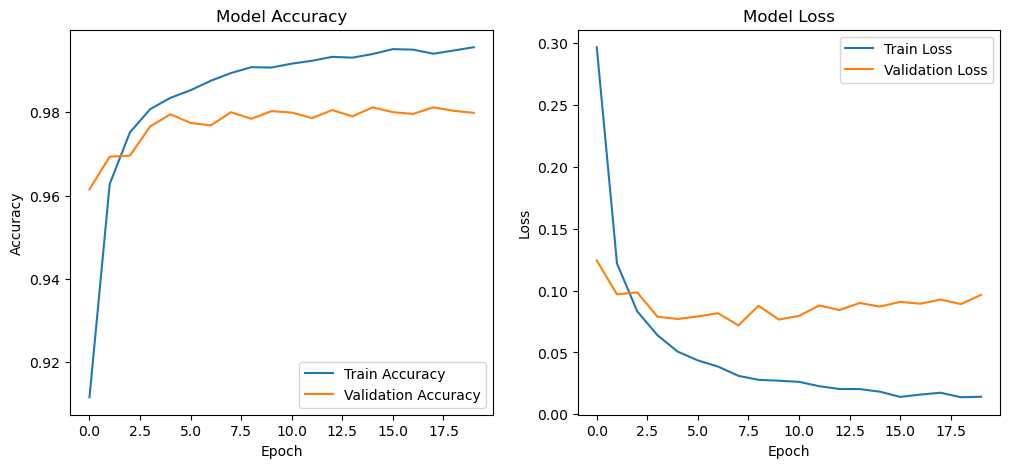

In [26]:
if __name__ == "__main__":
    
    (x_train, y_train), (x_test, y_test) =load_and_preprocess_data()
    model = create_model()
    history = train_model(model, x_train, y_train)
    evaluate_model(model, x_test, y_test)
    plot_training_history(history)

In [30]:
from sklearn.metrics import confusion_matrix,classification_report

y_pred = model.predict(x_test)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [31]:

y_pred_classes

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [33]:
print(classification_report(y_true_classes,y_pred_classes))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.99      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [34]:
import seaborn as sns

<Axes: >

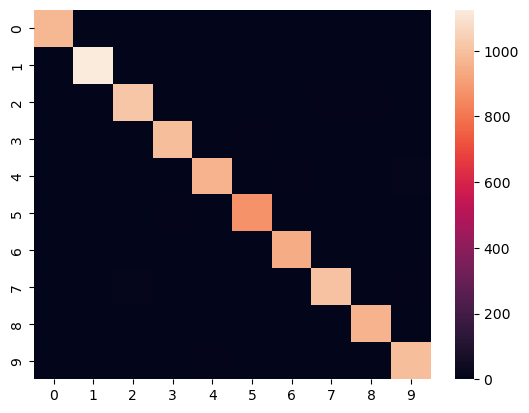

In [43]:
cm = confusion_matrix(y_true_classes,y_pred_classes)
sns.heatmap(cm)
# plt.figure(figsize=(15,29))

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,607,456 (6.13 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,071,638 (4.09 MB)

In [44]:
# cifar 10

In [45]:
cifar10=tf.keras.datasets.cifar10
(x_train2,y_train2),(x_test2,y_test2) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 262s 2us/step


In [55]:
x_train2, x_test2 = x_train2 / 255.0, x_test2 / 255.0

# flatten the label values
y_train2, y_test2 = y_train2.flatten(), y_test2.flatten()


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 45ms/step - accuracy: 0.1992 - loss: 2.1788 - val_accuracy: 0.3324 - val_loss: 1.8983
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3035 - loss: 1.9015 - val_accuracy: 0.3608 - val_loss: 1.7728
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.3300 - loss: 1.8348 - val_accuracy: 0.3802 - val_loss: 1.7472
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - accuracy: 0.3529 - loss: 1.7891 - val_accuracy: 0.3828 - val_loss: 1.7274
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 42ms/step - accuracy: 0.3606 - loss: 1.7552 - val_accuracy: 0.4131 - val_loss: 1.6696
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.3719 - loss: 1.7383 - val_accuracy: 0.4078 - val_loss: 1.6712
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.3824 - loss: 1.7088 - val_accuracy: 0.4175 - val_loss: 1.6498
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.3849 - loss: 1.7028 - 

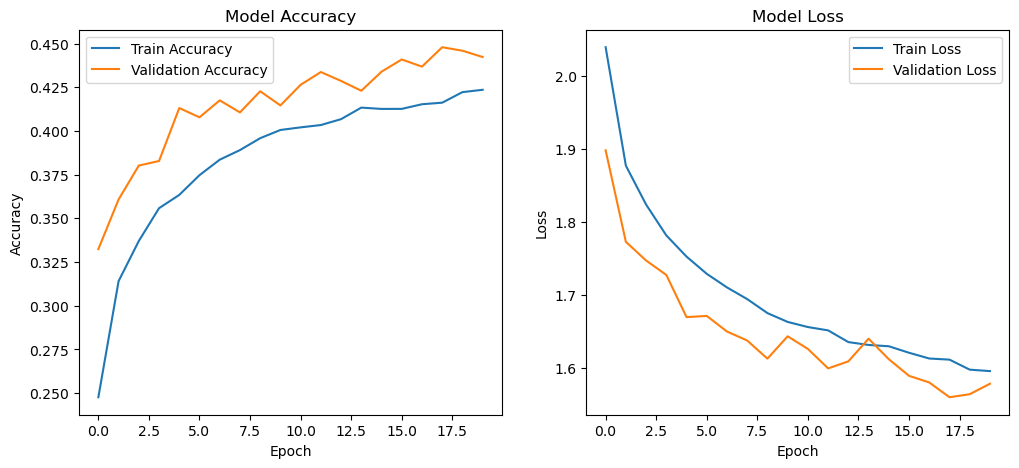

In [61]:


y_train_onehot = tf.keras.utils.to_categorical(y_train2, 10)
y_test_onehot = tf.keras.utils.to_categorical(y_test2, 10)

model2 = create_model2()
history2 = train_model(model2, x_train2, y_train_onehot)
evaluate_model(model2, x_test2, y_test_onehot)

plot_training_history(history2)




In [65]:
y_pred2 = model2.predict(x_test2)


y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true_classes2 = np.argmax(y_test_onehot, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [66]:
print(classification_report(y_true_classes2,y_pred_classes2))


              precision    recall  f1-score   support

           0       0.58      0.45      0.51      1000
           1       0.64      0.48      0.55      1000
           2       0.34      0.18      0.24      1000
           3       0.34      0.19      0.25      1000
           4       0.35      0.45      0.39      1000
           5       0.40      0.33      0.36      1000
           6       0.41      0.60      0.49      1000
           7       0.40      0.65      0.49      1000
           8       0.58      0.61      0.60      1000
           9       0.49      0.54      0.51      1000

    accuracy                           0.45     10000
   macro avg       0.45      0.45      0.44     10000
weighted avg       0.45      0.45      0.44     10000



<Axes: >

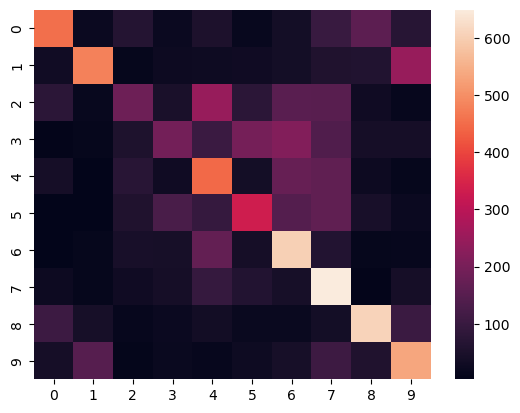

In [67]:
cm = confusion_matrix(y_true_classes2,y_pred_classes2)
sns.heatmap(cm)
# plt.figure(figsize=(15,29))